# Data Pre-Processing

In [2]:
import os
import datatable as dt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
os.chdir("/mnt/home/seguraab/Shiu_Lab/Collabs/Maize_GxE_Competition_Data/Training_Data")

## Pre-Processing 1_Training_Trait_Data_2014_2021.csv
__columns to impute/remove:__
- Range	13.77%: 	We can impute this. There are 119 unique plots.
- Pass	13.47%: 	We can impute this too. There are 256 unique values.
- Hybrid_Parent1: 	1.19%	remove
- Hybrid_Parent2: 	1.19%	remove
- Stand_Count_plants: 	8.57%	Impute based on the field and number of plants per plot
- Pollen_DAP_days: 	22.42%	Take the median based on env, date harvested, and hybrid
- Silk_DAP_days	24.17%: 	Take the median based on env, date harvested, and hybrid
- Plant_Height_cm	11.44%: 	Take the median based on env, date harvested, and hybrid
- Ear_Height_cm	11.43%: 	Take the median based on env, date harvested, and hybrid
- Root_Lodging_plants	43.85%: 	Take the median based on env, date harvested, and hybrid
- Stalk_Lodging_plants	35.43%: 	Take the median based on env, date harvested, and hybrid
- Yield_Mg_ha	5.77%: 	Take the median based on env, date harvested, and hybrid
- Grain_Moisture	5.71%: 	Take the median based on env, date harvested, and hybrid
- Twt_kg_m3	20.55%: 	Take the median based on env, date harvested, and hybrid

In [6]:
# Percentage of missing data
df1 = pd.read_csv("1_Training_Trait_Data_2014_2021.csv")
df1.isna().sum()/df1.shape[0]

Env                     0.000000
Year                    0.000000
Field_Location          0.000000
Experiment              0.000000
Replicate               0.000000
Block                   0.000000
Plot                    0.000000
Range                   0.137672
Pass                    0.134657
Hybrid                  0.000000
Hybrid_orig_name        0.000000
Hybrid_Parent1          0.011903
Hybrid_Parent2          0.011903
Plot_Area_ha            0.000007
Date_Planted            0.002662
Date_Harvested          0.008271
Stand_Count_plants      0.085676
Pollen_DAP_days         0.224223
Silk_DAP_days           0.241743
Plant_Height_cm         0.114409
Ear_Height_cm           0.114284
Root_Lodging_plants     0.438498
Stalk_Lodging_plants    0.354292
Yield_Mg_ha             0.057679
Grain_Moisture          0.057127
Twt_kg_m3               0.205511
dtype: float64

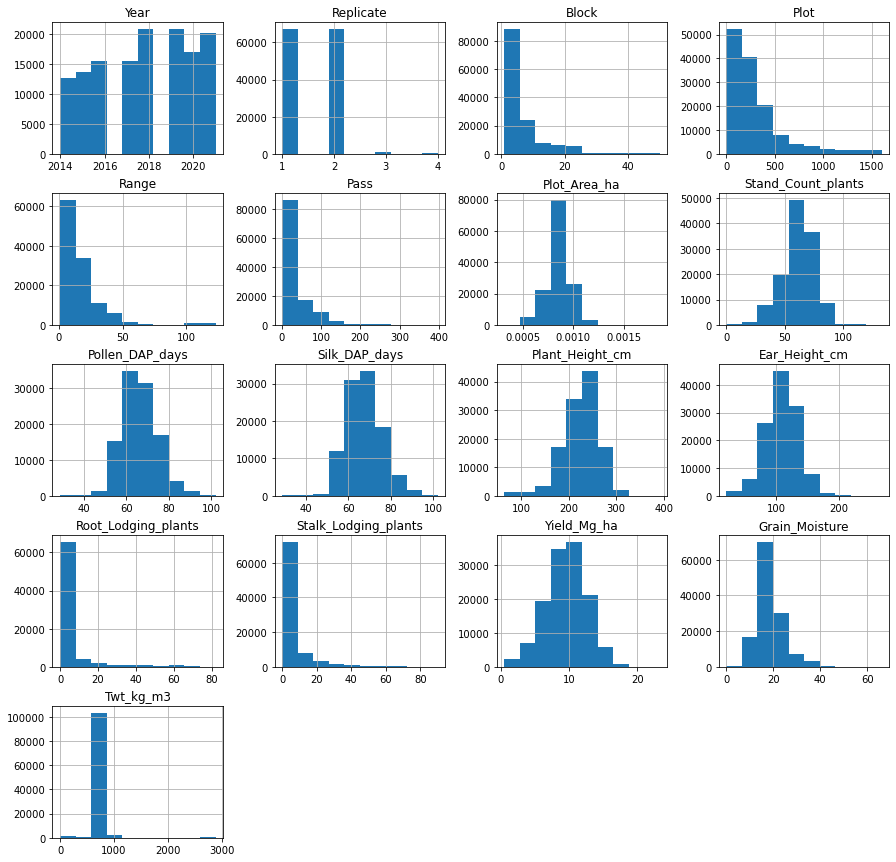

In [7]:
# Histogram of values of numerical columns
ax = df1.hist(figsize=(15,15), align="mid")
plt.savefig("1_Training_Trait_Data_2014_2021.csv.png")

In [ ]:
# Drop columns
df1_imputed = df1.drop(columns=["Hybrid_Parent1", "Hybrid_Parent2", "Range", "Pass"])

In [ ]:
# Replace missing values for "Stand_Count_plants"
# df1["Stand_Count_plants"].isna().sum()
df1["Groups"] = ["-".join(i) for i in zip(df1.Env.map(str), df1.Hybrid.map(str), df1["Block"].map(str), df1["Date_Planted"].map(str), df1["Date_Harvested"].map(str))]
df1["Env_Bl_Hyb"] = ["-".join(i) for i in zip(df1.Env.map(str), df1.Block.map(str), df1.Hybrid.map(str))]
df1["Env_Hybrid"] = df1.Env.str.cat(df1.Hybrid, sep="-")
tmp = df1["Stand_Count_plants"].fillna(df1.groupby(["Groups", pd.cut(df1["Plant_Height_cm"], np.arange(0, 391+100, 100))])["Stand_Count_plants"].transform("median"))
tmp = tmp.fillna(df1.groupby(["Groups", pd.cut(df1["Ear_Height_cm"], np.arange(0, 268+100, 100))])["Stand_Count_plants"].transform("median"))
tmp = tmp.fillna(df1.groupby(["Groups", pd.cut(df1["Grain_Moisture"], np.arange(0, 66+10, 10))])["Stand_Count_plants"].transform("median"))
tmp = tmp.fillna(df1.groupby(["Env_Bl_Hyb", pd.cut(df1["Plant_Height_cm"], np.arange(0, 391+100, 100))])["Stand_Count_plants"].transform("median"))
tmp = tmp.fillna(df1.groupby(["Env_Bl_Hyb", pd.cut(df1["Ear_Height_cm"], np.arange(0, 268+100, 100))])["Stand_Count_plants"].transform("median"))
tmp = tmp.fillna(df1.groupby(["Env_Bl_Hyb", pd.cut(df1["Grain_Moisture"], np.arange(0, 66+10, 10))])["Stand_Count_plants"].transform("median"))
tmp = tmp.fillna(df1.groupby(["Env_Hybrid", pd.cut(df1["Plant_Height_cm"], np.arange(0, 391+100, 100))])["Stand_Count_plants"].transform("median"))
tmp = tmp.fillna(df1.groupby(["Env_Hybrid", pd.cut(df1["Ear_Height_cm"], np.arange(0, 268+100, 100))])["Stand_Count_plants"].transform("median"))
tmp = tmp.fillna(df1.groupby(["Env_Hybrid", pd.cut(df1["Grain_Moisture"], np.arange(0, 66+10, 10))])["Stand_Count_plants"].transform("median"))
tmp = tmp.fillna(df1.groupby(["Groups", pd.cut(df1["Silk_DAP_days"], np.arange(0, 102+20, 20))])["Stand_Count_plants"].transform("median"))
tmp = tmp.fillna(df1.groupby(["Env_Bl_Hyb", pd.cut(df1["Silk_DAP_days"], np.arange(0, 102+20, 20))])["Stand_Count_plants"].transform("median"))
tmp = tmp.fillna(df1.groupby(["Env_Hybrid", pd.cut(df1["Silk_DAP_days"], np.arange(0, 102+20, 20))])["Stand_Count_plants"].transform("median"))
tmp = tmp.fillna(df1.groupby(["Groups", pd.cut(df1["Grain_Moisture"], np.arange(0, 66+30, 30))])["Stand_Count_plants"].transform("median"))
tmp = tmp.fillna(df1.groupby(["Env_Bl_Hyb", pd.cut(df1["Grain_Moisture"], np.arange(0, 66+30, 30))])["Stand_Count_plants"].transform("median"))
tmp = tmp.fillna(df1.groupby(["Env_Hybrid", pd.cut(df1["Grain_Moisture"], np.arange(0, 66+30, 30))])["Stand_Count_plants"].transform("median"))
tmp = tmp.fillna(df1.groupby(["Env", "Experiment", "Block", "Hybrid", "Date_Planted",  "Date_Harvested"])["Stand_Count_plants"].transform("median"))
tmp = tmp.fillna(df1.groupby(["Env", "Block", "Hybrid", "Date_Planted",  "Date_Harvested"])["Stand_Count_plants"].transform("median"))
tmp = tmp.fillna(df1.groupby(["Env", "Hybrid", "Date_Planted",  "Date_Harvested"])["Stand_Count_plants"].transform("median"))
tmp = tmp.fillna(df1.groupby(["Env", "Experiment", "Block", "Hybrid", "Date_Planted"])["Stand_Count_plants"].transform("median"))
tmp = tmp.fillna(df1.groupby(["Env", "Experiment", "Block", "Hybrid"])["Stand_Count_plants"].transform("median"))
tmp = tmp.fillna(df1.groupby(["Env", "Experiment", "Hybrid"])["Stand_Count_plants"].transform("median"))
tmp = tmp.fillna(df1.groupby(["Env", "Hybrid"])["Stand_Count_plants"].transform("median"))
tmp = tmp.fillna(df1.groupby(["Hybrid", pd.cut(df1["Plant_Height_cm"], np.arange(0, 391+5, 5))])["Stand_Count_plants"].transform("median"))
tmp = tmp.fillna(df1.groupby(["Hybrid", pd.cut(df1["Ear_Height_cm"], np.arange(0, 268+5, 5))])["Stand_Count_plants"].transform("median"))
tmp = tmp.fillna(df1.groupby(["Hybrid", pd.cut(df1["Silk_DAP_days"], np.arange(0, 102+1, 1))])["Stand_Count_plants"].transform("median"))
tmp = tmp.fillna(df1.groupby(["Hybrid", pd.cut(df1["Grain_Moisture"], np.arange(0, 66+1, 1))])["Stand_Count_plants"].transform("median"))
tmp = tmp.fillna(df1.groupby(["Hybrid", pd.cut(df1["Plant_Height_cm"], np.arange(0, 391+3, 3))])["Stand_Count_plants"].transform("median"))
tmp = tmp.fillna(df1.groupby(["Hybrid", pd.cut(df1["Ear_Height_cm"], np.arange(0, 268+3, 3))])["Stand_Count_plants"].transform("median"))
tmp = tmp.fillna(df1.groupby(["Hybrid", pd.cut(df1["Yield_Mg_ha"], np.arange(0, 23+1, 1))])["Stand_Count_plants"].transform("median"))
tmp = tmp.fillna(df1.groupby(["Hybrid", pd.cut(df1["Pollen_DAP_days"], np.arange(0, 102+1, 1))])["Stand_Count_plants"].transform("median"))
tmp = tmp.fillna(df1.groupby(["Year", pd.cut(df1["Yield_Mg_ha"], np.arange(0, 23+1, 1))])["Stand_Count_plants"].transform("median"))
tmp = tmp.fillna(df1.groupby(["Year", pd.cut(df1["Plant_Height_cm"], np.arange(0, 391+1, 1))])["Stand_Count_plants"].transform("median"))
tmp = tmp.fillna(df1.groupby(["Year", pd.cut(df1["Silk_DAP_days"], np.arange(0, 102+1, 1))])["Stand_Count_plants"].transform("median"))
tmp = tmp.fillna(df1.groupby(["Year", "Block", "Replicate", "Hybrid", "Date_Planted", "Date_Harvested"])["Stand_Count_plants"].transform("median"))
tmp = tmp.fillna(df1.groupby(["Year", "Block", "Replicate", "Hybrid", "Date_Harvested"])["Stand_Count_plants"].transform("median"))
tmp = tmp.fillna(df1.groupby(["Year", "Block", "Hybrid", "Date_Harvested"])["Stand_Count_plants"].transform("median"))
tmp = tmp.fillna(df1.groupby(["Year", "Block", "Replicate", "Hybrid"])["Stand_Count_plants"].transform("median"))
tmp = tmp.fillna(df1.groupby(["Year", "Block", "Plot", "Hybrid"])["Stand_Count_plants"].transform("median"))
tmp = tmp.fillna(df1.groupby(["Year", "Block", "Hybrid"])["Stand_Count_plants"].transform("median"))
tmp = tmp.fillna(df1.groupby(["Year", "Block", "Replicate", "Plot", "Date_Planted", "Date_Harvested"])["Stand_Count_plants"].transform("median"))
tmp = tmp.fillna(df1.groupby(["Year", "Block", "Replicate", "Plot", "Date_Harvested"])["Stand_Count_plants"].transform("median"))
tmp = tmp.fillna(df1.groupby(["Year", "Block", "Replicate", "Plot", "Date_Planted"])["Stand_Count_plants"].transform("median"))
tmp = tmp.fillna(df1.groupby(["Year", "Block", "Replicate", "Plot", "Range", "Pass"])["Stand_Count_plants"].transform("median"))
tmp = tmp.fillna(df1.groupby(["Year", "Block", "Replicate", "Plot", "Range"])["Stand_Count_plants"].transform("median"))
tmp = tmp.fillna(df1.groupby(["Year", "Block", "Replicate", "Plot"])["Stand_Count_plants"].transform("median"))
tmp = tmp.fillna(df1.groupby(["Year", "Block", "Replicate"])["Stand_Count_plants"].transform("median"))
tmp = tmp.fillna(df1.groupby(["Year"])["Stand_Count_plants"].transform("median"))
df1_imputed["Stand_Count_plants"] = tmp # replace variable with imputed values
# df1_imputed.isna().sum()

In [ ]:
# Replace missing values for "Plot_Area_ha", "Date_Planted", and "Date_Harvested"
# df1["Plot_Area_ha"].isna().sum()
# df1["Date_Planted"].isna().sum()
# df1["Date_Harvested"].isna().sum()
def fill_na(col, groups, df1_imputed):
    out_df = df1_imputed.copy()
    """
    Function to replace missing dates in Date_Planted and Date_Harvested columns
    # Args
    col (str): column name in df1_imputed
    groups (dict): dictionary of pandas groupby object
    """
    for key, value in groups.items(): # iterate through each group
        # print(key[0])
        # print(key[1])
        # column to impute by group
        to_replace = out_df.loc[(out_df["Env"]==key[0]) & (out_df["Experiment"]==key[1]), col]
        if to_replace.isna().any(): # if there are missing values
            value = list(value)
            # check if there is a date and a nan
            if len(value)==2:
                value.remove(np.nan) # remove the missing value
                to_replace.fillna(value[0], inplace=True) # set the date for all missing values
            if len(value)==1:
                to_replace.fillna(value[0], inplace=True) # set the date for all missing values
            if len(value) > 2:
                value.remove(np.nan) # remove the missing value
                to_replace.fillna(value[0], inplace=True) # set the date for all missing values
        # replace missing values in df1_imputed
        out_df.loc[(out_df["Env"]==key[0]) & (out_df["Experiment"]==key[1]), col] = to_replace
    return (out_df)

# Impute "Plot_Area_ha"
df1_imputed["Plot_Area_ha"] = df1["Plot_Area_ha"].fillna(df1.groupby(["Env", "Experiment", "Block"])["Plot_Area_ha"].transform("mean"))

# Impute "Date_Planted"
groups=df1.groupby(["Env", "Experiment"])["Date_Planted"].unique().to_dict()
out = list(map(len, list(groups.values()))) # check that there is either a date and a nan (len = 2) or just a date (len = 1)
set(out) # unique lengths
df1_imputed = fill_na("Date_Planted", groups, df1_imputed)
df1_imputed.loc[df1_imputed["Date_Planted"].isna(), "Date_Planted"] # zero missing values remain!

# Impute "Date_Harvested"
groups=df1.groupby(["Env", "Experiment"])["Date_Harvested"].unique().to_dict()
out = list(map(len, list(groups.values()))) # check that there is either a date and a nan (len = 2) or just a date (len = 1)
set(out) # unique lengths
df1_imputed = fill_na("Date_Harvested", groups, df1_imputed)
df1_imputed.loc[df1_imputed["Date_Harvested"].isna(), "Date_Harvested"] # there are still 594/1125 missing values remaining
df1_imputed.loc[df1_imputed["Date_Harvested"].isna(), "Env":"Date_Harvested"]["Env"].unique() # envs with missing dates
df1_imputed.loc[(df1_imputed["Env"]=="SCH1_2020") & (df1_imputed["Date_Harvested"].isna()), "Env":"Date_Harvested"].index.to_list() # manually check the index ranges
df1_imputed.loc[df1_imputed["Env"]=="SCH1_2020"]["Date_Harvested"].unique() # unique harvest dates
df1_imputed.iloc[110870:110916, 11] = "9/22/20" # replace missing values
df1_imputed.iloc[111167:111213, 11] = "9/23/20"
df1_imputed.loc[(df1_imputed["Env"]=="SCH1_2020") & (df1_imputed["Date_Harvested"].isna()), "Env":"Date_Harvested"] # there are 2/1125 missing values
df1_imputed.iloc[110915:110920, 11] # check what the dates surround the nan are
df1_imputed.iloc[111211:111215, 11]
# replace missing values
df1_imputed.iloc[110916,11] = "9/22/20"
df1_imputed.iloc[111213,11] = "9/23/29"
df1_imputed.loc[(df1_imputed["Env"]=="SCH1_2020") & (df1_imputed["Date_Harvested"].isna()), "Env":"Date_Harvested"] # zero missing values remain!

In [ ]:
# Replace missing values for "Pollen_DAP_days"
# df1["Pollen_DAP_days"].isna().sum()

## Samples with both Yield and Genotype Data

In [4]:
geno = open("../Training_Data/5_Genotype_Data_All_Years.vcf", "r").readlines()[24:25]
geno

In [ ]:
geno.columns